# Prepare Environment

In [3]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from IPython.display import display

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["axes.grid"] = False
%matplotlib inline

In [4]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2.11.0


**Note**: most of the code in the notebook is a simplified version of the tutorial example from Tensorflow ([here](https://www.tensorflow.org/tutorials/keras/classification))

# Import the CIFAR10 dataset



<table>
  <tr><td>
    <img src="https://cdn-images-1.medium.com/freeze/max/1000/1*LyV7_xga4jUHdx4_jHk1PQ.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://www.cs.toronto.edu/~kriz/cifar.html">CIFAR10 samples</a>, collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton.<br/>&nbsp;
  </td></tr>
</table>

Here, 50,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. Tensorflow provides CIFAR10 small images classification dataset that we can use as follows:

The expected output:

```
Training set: (50000, 32, 32, 3), (50000, 1)
Test set: (10000, 32, 32, 3), (10000, 1)
```

In [5]:
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
 # YOUR CODE HERE

print(f'Training set: {X_train.shape}, {y_train.shape}')
print(f'Test set: {X_test.shape}, {y_test.shape}')

170498071/170498071 [==============================] - 2s 0us/step
Training set: (50000, 32, 32, 3), (50000, 1)
Test set: (10000, 32, 32, 3), (10000, 1)


Further split the training set into training (40,000) and validation (10,000) sets.

The expected output:
```
Training set: (40000, 32, 32, 3), (40000, 1)
Validation set: (10000, 32, 32, 3), (10000, 1)
Test set: (10000, 32, 32, 3), (10000, 1)
```

In [6]:
from sklearn.model_selection import train_test_split
# YOUR CODE HERE
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train, y_train, 
    random_state=42,
    test_size=10000)

print(f'Training set: {X_train.shape}, {y_train.shape}')
print(f'Validation set: {X_valid.shape}, {y_valid.shape}')
print(f'Test set: {X_test.shape}, {y_test.shape}')

Training set: (40000, 32, 32, 3), (40000, 1)
Validation set: (10000, 32, 32, 3), (10000, 1)
Test set: (10000, 32, 32, 3), (10000, 1)


As the labels have an extra dimension (i.e., `(xxx, 1)`), we need to squeeze them to be `(xxx, )`. You may find the `np.squeeze()` function useful. The expected output should be

```
Training set: (40000, 32, 32, 3), (40000,)
Validation set: (10000, 32, 32, 3), (10000,)
Test set: (10000, 32, 32, 3), (10000,)
```

In [7]:
# YOUR CODE HERE
y_train = np.squeeze(y_train)
y_valid = np.squeeze(y_valid)
y_test = np.squeeze(y_test)

print(f'Training set: {X_train.shape}, {y_train.shape}')
print(f'Validation set: {X_valid.shape}, {y_valid.shape}')
print(f'Test set: {X_test.shape}, {y_test.shape}')

Training set: (40000, 32, 32, 3), (40000,)
Validation set: (10000, 32, 32, 3), (10000,)
Test set: (10000, 32, 32, 3), (10000,)


The images are 32x32x3 NumPy arrays, with pixel values ranging from 0 to 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the following classes:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>Airplane</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Automobile</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Bird</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Cat</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Deer</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Dog</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Frog</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Horse</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Ship</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Truck</td>
  </tr>
</table>

Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

In [8]:
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
# YOUR CODE HERE

Let's look at an example of the fashion MNIST.

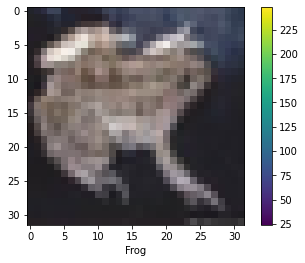

In [9]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.xlabel(class_names[y_train[0]])
plt.show()

# Data Preprocessing

It is a common pratice to **normalize the range of independent variables or features of data**. This is mainly because many classifiers calculate the distance between two points by the Euclidean distance. If one of the features has a broad range of values, the distance will be governed by this particular feature. Therefore, the range of all features should be normalized **so that each feature contributes approximately proportionately to the final distance**.

There are many other feature scaling techniques, which can be found in [here](https://en.wikipedia.org/wiki/Feature_scaling).

In this exercise, we'll only scale the inputs to be in the range [0-1] rather than [0-255].

In [10]:
# YOUR CODE HERE
# Scale the Fashion MNIST data to be in the range [0-1]
# Note: The maximum value of color value is 255
X_train = X_train / 255.0
X_valid = X_valid / 255.0
X_test = X_test / 255.0

Training set


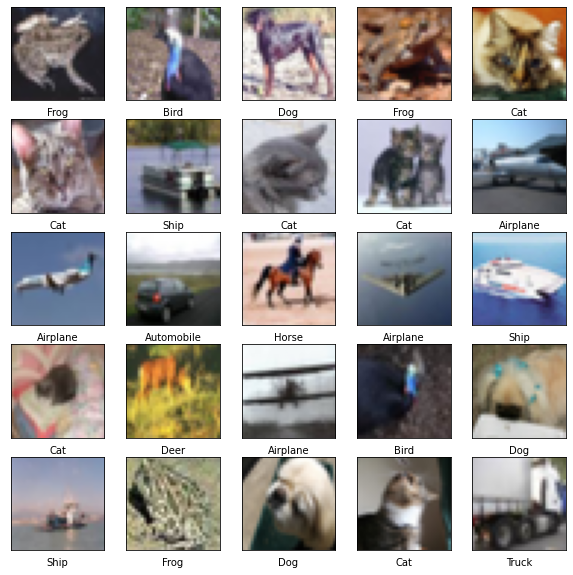

Validation set


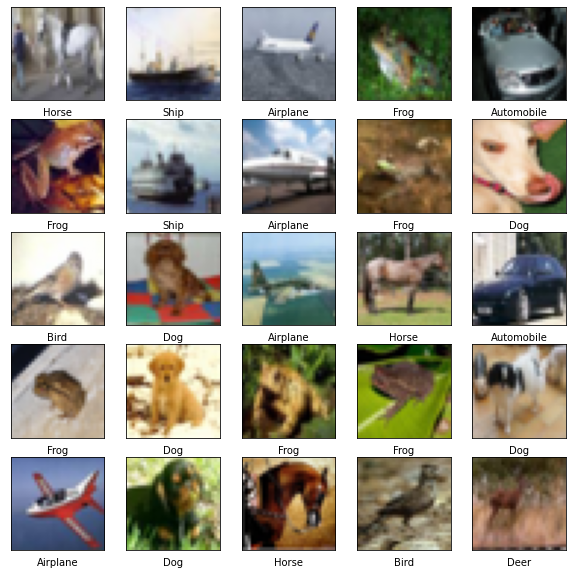

Test set


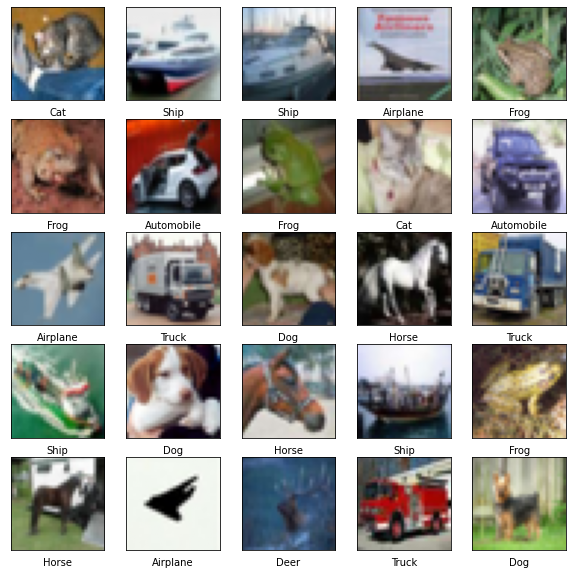

In [11]:
def plot_data(images, labels):
    plt.figure(figsize=(10,10))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()
    plt.close('all')

print("Training set")
plot_data(X_train, y_train)

print("Validation set")
plot_data(X_valid, y_valid)

print("Test set")
plot_data(X_test, y_test)

# Define a Model

Please define a deep learning model that you would like to use for this problem here.

**Hint**: The model need to first flatten the image from a three-dimensional array to a one-dimensional array before feeding to the `tf.keras.Dense` layer.

In [28]:
from keras.models import Sequential
from keras.layers import *

# YOUR CODE HERE
num_classes = 10

# YOUR CODE HERE
model = keras.Sequential([
    # Layer 1 - Flatten the input from an image (28 * 28) to a vector (784)
    keras.layers.Flatten(input_shape=(32,32,3)),
    # Layer 2 - Dense layer (i.e., fully-connected)
    keras.layers.Dense(128, activation='relu'),
    # Layer 3 - Dense layer (i.e., fully-connected)
    keras.layers.Dense(128, activation='relu'),
    # Layer 4 - Dense layer (i.e., fully-connected)
    # Note: the number of neurons in the last layer must be equal to the number
    #       of output classes (which is 10 in this example).
    keras.layers.Dense(num_classes, activation='softmax')
])


model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_3 (Dense)             (None, 128)               393344    
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 411,146
Trainable params: 411,146
Non-trainable params: 0
_________________________________________________________________


# Train a Model

In this section, we will first define several parameters that will be used during the training.

*   `epochs`: the number of training epochs (one epoch means the model has seen the entire training samples one times).
*   `batch_size`: the number of examples per one training step.
*   `learning_rate`: a hyperparameter that defines the adjustment in the weights of our network with respect to the loss gradient.


In [44]:
# YOUR CODE HERE
epochs = 30
batch_size = 128
learning_rate = 0.01

## Loss Function

Which loss function should we use for this CIFAR10?

In [45]:
# YOUR CODE HERE
# Cross-entropy loss
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)

## Optimizer

The optimizers that are commonly used to train deep learning models are Stochastic Gradient Descent (SGD), Adam, RMSProp, Adadelta, etc. The list of optimizers provided by TF-Keras can be found [here](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers).

In [46]:
# YOUR CODE HERE
# Stochastic gradient descent (SGD)
optimizer = keras.optimizers.SGD(lr=learning_rate)

## Compile the Model

Next, we configures the model for training by calling `compile()` function.

In [47]:
# YOUR CODE HERE
model.compile(
    loss=loss,
    optimizer=optimizer,
    metrics=['accuracy'])

## Train a model

We are now ready to train our model. Let's start feeding the data to train the model and it will learn to classify images.

**Note**: The `fit()` function will return the training log, and we will keep it in `hist`.

You can read more on the arguments for the `fit` function [here](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#fit).

In [48]:
# YOUR CODE HERE
hist = model.fit(
    X_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_valid, y_valid),
    # validation_split=0.1,
    verbose=1)

Epoch 1/30
313/313 [==============================] - 3s 6ms/step - loss: 1.4161 - accuracy: 0.5029 - val_loss: 1.5748 - val_accuracy: 0.4478
Epoch 2/30
313/313 [==============================] - 2s 5ms/step - loss: 1.4086 - accuracy: 0.5054 - val_loss: 1.4978 - val_accuracy: 0.4718
Epoch 3/30
313/313 [==============================] - 1s 4ms/step - loss: 1.4010 - accuracy: 0.5100 - val_loss: 1.5350 - val_accuracy: 0.4561
Epoch 4/30
313/313 [==============================] - 1s 4ms/step - loss: 1.3892 - accuracy: 0.5132 - val_loss: 1.5361 - val_accuracy: 0.4560
Epoch 5/30
313/313 [==============================] - 1s 4ms/step - loss: 1.3832 - accuracy: 0.5163 - val_loss: 1.5594 - val_accuracy: 0.4568
Epoch 6/30
313/313 [==============================] - 1s 4ms/step - loss: 1.3783 - accuracy: 0.5177 - val_loss: 1.4806 - val_accuracy: 0.4810
Epoch 7/30
313/313 [==============================] - 1s 4ms/step - loss: 1.3659 - accuracy: 0.5226 - val_loss: 1.5068 - val_accuracy: 0.4610
Epoch 

Next we will plot the loss and the accuracy to see whether the model is subject to the overfitting or the underfitting problems.

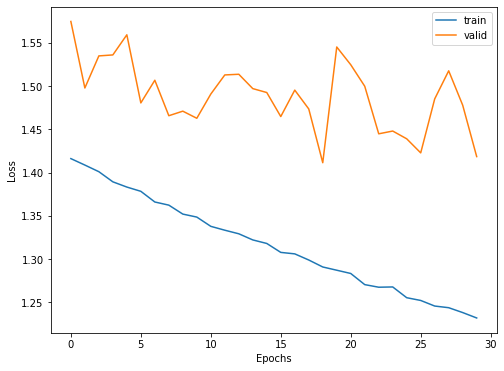

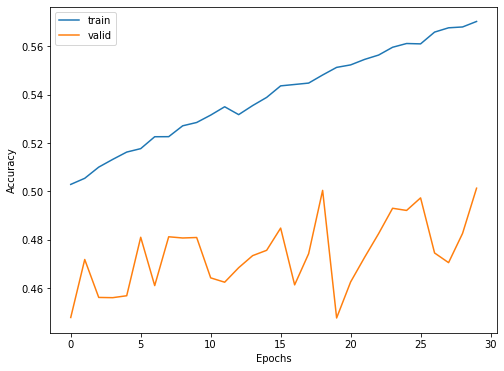

In [49]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(hist.history['loss'], label='train')
ax.plot(hist.history['val_loss'], label='valid')
ax.set_ylabel('Loss')
ax.set_xlabel('Epochs')
plt.legend()
plt.show()

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(hist.history['accuracy'], label='train')
ax.plot(hist.history['val_accuracy'], label='valid')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epochs')
plt.legend()
plt.show()

plt.close('all')

Let's see the model prediction in details. Here we will apply the trained model on the validation set.

The expected output:
```
(10000, 10)
(10000,)
```

In [50]:
# Predict the probability of each image
# YOUR CODE HERE
y_hat_valid_probs = model.predict(X_valid)

# Select the class with the highest probability as the predicted class.
# YOUR CODE HERE
# Convert the label back to the original format
y_hat_valid = np.argmax(y_hat_valid_probs, axis=-1)

print(y_hat_valid_probs.shape)
print(y_hat_valid.shape)


313/313 [==============================] - 1s 2ms/step
(10000, 10)
(10000,)


To make it more human-friendly, we will visualize the input image and its corresponding prediction to see how our model performs.

In [51]:
def plot_image(i, probs, true_label, img):
    probs, true_label, img = probs, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(probs)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel(
        '{} {:2.0f}% ({})'.format(
            class_names[predicted_label],
            100*np.max(probs),
            class_names[true_label]),
        color=color)
    
def plot_prob_dist(i, probs, true_label):
    probs, true_label = probs, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), probs, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(probs, axis=-1)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

def plot_output(probs, images, labels):
    num_rows = 5
    num_cols = 3
    num_images = num_rows*num_cols
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))
    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, probs[i], labels, images)
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_prob_dist(i, probs[i], labels)
    plt.tight_layout()
    plt.show()

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>Airplane</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Automobile</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Bird</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Cat</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Deer</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Dog</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Frog</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Horse</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Ship</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Truck</td>
  </tr>
</table>

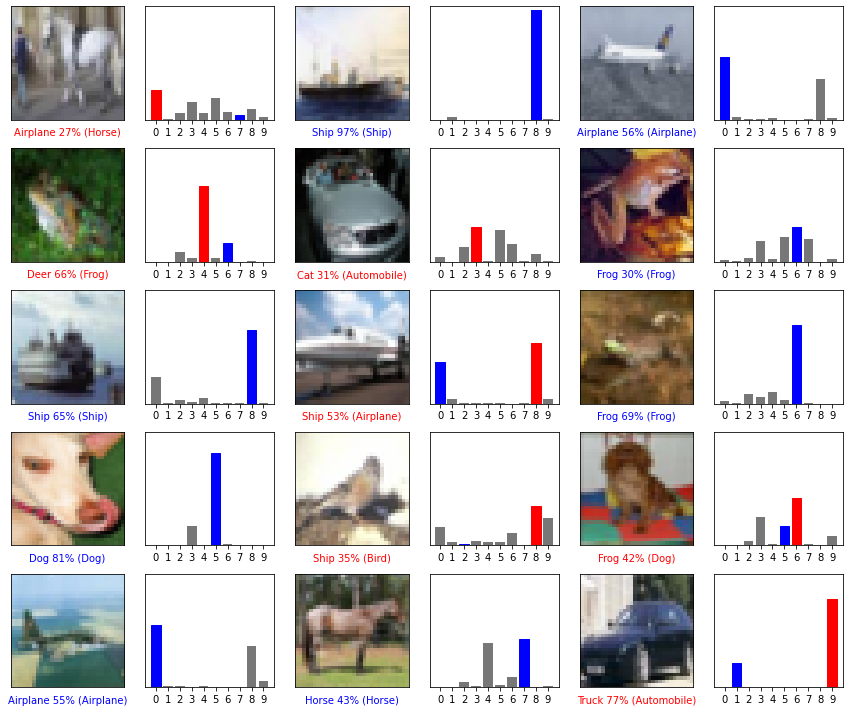

In [52]:
# Color correct predictions in blue and incorrect predictions in red.
plot_output(y_hat_valid_probs, X_valid, y_valid)

In [53]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Validation Set')
print(confusion_matrix(y_true=y_valid, y_pred=y_hat_valid))
print(f'Accuracy: {accuracy_score(y_true=y_valid, y_pred=y_hat_valid):.2f}')
print(f'Macro F1-score: {f1_score(y_true=y_valid, y_pred=y_hat_valid, average="macro"):.2f}')

Validation Set
[[631  32  26  31  19  43  20  33  83  55]
 [ 58 565  11  26  12  17  31  19  58 182]
 [129  22 256  91 120 136 183  45  21  27]
 [ 45  20  44 310  40 283 200  32  17  32]
 [ 88   9  61  40 379  83 165  62  25  21]
 [ 29  16  52 163  51 481 141  50  13  19]
 [ 18  11  26  60  68  88 674  25   6  20]
 [ 68  11  30  63  94 108  51 505  12  52]
 [178  65   7  41  13  38  15   9 596  55]
 [ 79 124   9  29   4  46  44  36  53 616]]
Accuracy: 0.50
Macro F1-score: 0.50


# Evaluate Performance on Test Set

Once you have finished the model training, you then evaluate the classification performance on the test set (i.e., the unseen dataset).

In [54]:
# YOUR CODE HERE
y_hat_test_probs = model.predict(X_test)
# Convert the label back to the original format
y_hat_test = np.argmax(y_hat_test_probs, axis=-1)

313/313 [==============================] - 1s 2ms/step


In [55]:
print('Test Set')
print(confusion_matrix(y_true=y_test, y_pred=y_hat_test))
print(f'Accuracy: {accuracy_score(y_true=y_test, y_pred=y_hat_test):.2f}')
print(f'Macro F1-score: {f1_score(y_true=y_test, y_pred=y_hat_test, average="macro"):.2f}')

Test Set
[[673  25  23  23  21  35  30  20  91  59]
 [ 58 561   8  21  11  37  26  14  64 200]
 [122  17 258  80 112 138 178  59  13  23]
 [ 46  12  47 286  34 293 188  34  13  47]
 [ 76  10  96  49 364  87 205  74  16  23]
 [ 35  12  40 165  51 496 117  48  15  21]
 [ 12   9  33  51  59  65 727  13  12  19]
 [ 59  11  33  66  69 115  61 521  13  52]
 [173  48   3  35  17  45  17  11 588  63]
 [ 70 134   9  28   6  39  43  34  54 583]]
Accuracy: 0.51
Macro F1-score: 0.50


# Error Analysis

It's always a good idea to inspect the output and make sure everything looks fine. Here we'll look at some examples our model gets right, and some examples it gets wrong on the test sets.

First, we determine which samples are correct or incorrect on the test set.

In [56]:
# YOUR CODE HERE
correct_indices = np.where(y_hat_test == y_test)[0]
incorrect_indices = np.where(y_hat_test != y_test)[0]

Then we plot the images with their corresponding classes. In the incorrect case, we also plot the ground truth classes for comparison.

Correct


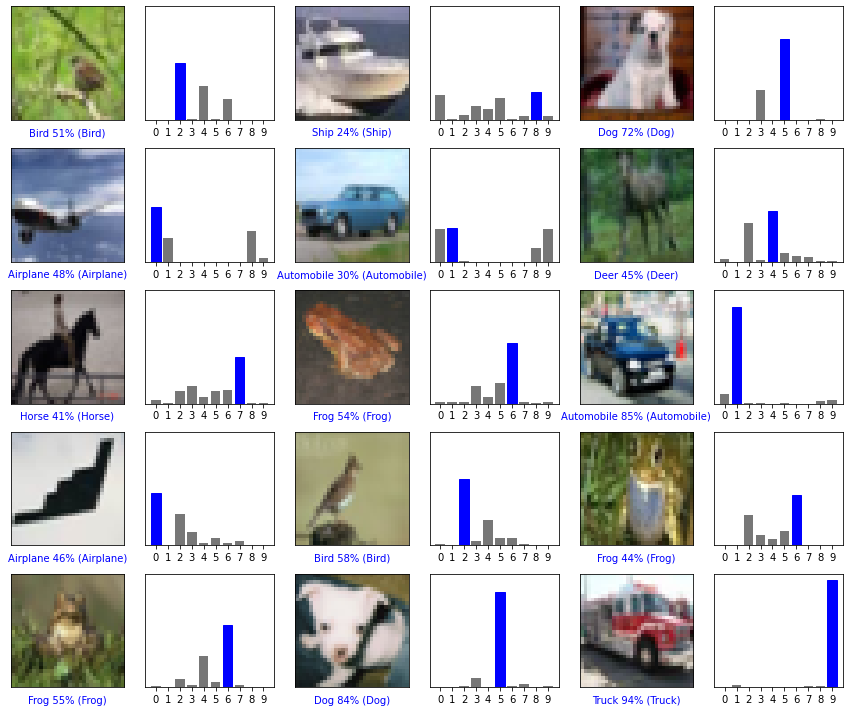

In [57]:
# Correct
idx = np.random.choice(np.arange(len(correct_indices)), 15)
print('Correct')
plot_output(
    y_hat_test_probs[correct_indices[idx]],
    X_test[correct_indices[idx]],
    y_test[correct_indices[idx]])

Incorrect


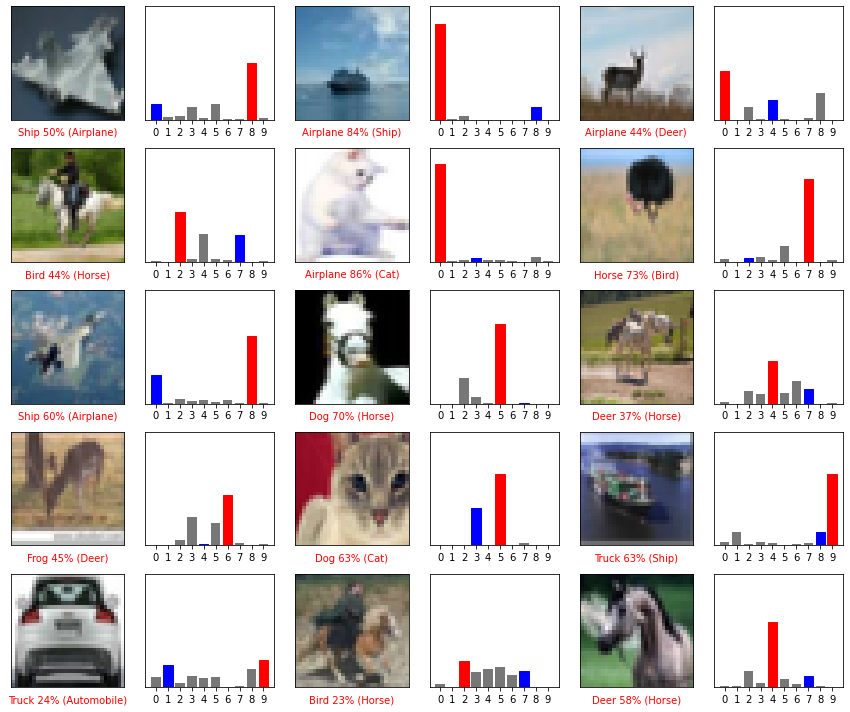

In [58]:
# Incorrect
idx = np.random.choice(np.arange(len(incorrect_indices)), 15)
print('Incorrect')
plot_output(
    y_hat_test_probs[incorrect_indices[idx]],
    X_test[incorrect_indices[idx]],
    y_test[incorrect_indices[idx]])

In [59]:
!pip install --upgrade jedi==0.10.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.5/190.5 KB 5.6 MB/s eta 0:00:00


In [ ]:
#%%shell
!jupyter nbconvert --to html /content/ITDS252_Lab_10_2_6487076.ipynb